<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch05_11_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%8B%A4%EC%8A%B5_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8%ED%83%90%EC%83%89_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Setting')
from setting_import import *
from setting_from import *

Mounted at /content/drive
TemoBot | import numpy as np
TemoBot | import matplotlib.pyplot as plt
TemoBot | import pandas as pd
TemoBot | plt.style.use('dark_background')
TemoBot | import warnings / action='ignore' 
TemoBot | import matplotlib.patches as mpatches
TemoBot | import seaborn as sns
TemoBot | import time
TemoBot | import random
TemoBot | import math
TemoBot | import os
TemoBot | import scipy as sp
TemoBot | import statsmodels.api as sm
TemoBot | import requests
TemoBot | import matplotlib as mpl
TemoBot | import matplotlib.pylab as plb
TemoBot | import sklearn as sk
TemoBot | import seaborn as sns
TemoBot | from sklearn.preprocessing import StandardScaler
TemoBot | from sklearn.model_selection import train_test_split
TemoBot | from sklearn.tree import DecisionTreeClassifier, plot_tree
TemoBot | from sklearn.datasets import load_iris
TemoBot | from sklearn.linear_model import LogisticRegression
TemoBot | from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Tem

# ch05.11. 사이킷런 실습 - 분류모델 탐색
---
* 날짜:
* 이름:

## 학습내용
    - 소프트맥스 회귀 프로세스를 이해한다.
    - 소프트맥스 함수를 구현한다.

## 학습자료
- [머신러닝 교과서 with파이썬, 사이킷런, 텐서플로](http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791165215187)
- 3장. 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어
- [sckitlearn [1.12. Multiclass and multioutput algorithms]](https://scikit-learn.org/stable/modules/multiclass.html)

In [25]:
def draw(loaderint=3, loaderstr='sepal', chaosstr='gini', maxdepth=3, TRE=True, DEC=True, ACC=True):

    X_train, X_test, y_train, y_test, columns, labels = iris_loader(loaderint, loaderstr) 
    
    model = DecisionTreeClassifier(criterion=chaosstr, 
                                max_depth=maxdepth)
    model.fit(X_train, y_train)

    if ACC:
        acc = model.score(X_test, y_test)
        draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc, 2)}')
        plt.show()

    if DEC:
        draw_decision_region(model, X_train, y_train,
                    X_test, y_test,
                    features=columns,
                    labels=labels)
        plt.show()

    if TRE:
        plt.figure(figsize=(12,8))
        plot_tree(model)
        plt.show()

```
import numpy as np
import matplotlib.pyplot as plt
```

### **데이터 준비 : Iris**

In [3]:
def iris_loader(n_classes, 
                        features='',
                        test_size=0.2, 
                        rs=1,
                        scale=True):
    
    iris = load_iris()
    X = iris.data # (n, 4)
    y = iris.target # (n, ) y는 (0,1)
    columns = iris.feature_names #특징
    labels = iris.target_names # 꽃 종류 
    
    # 클래스 개수 지정
    if n_classes ==2:
        mask = y!=2
        X = X[mask]
        y = y[mask]
        labels = labels[:2]

    else: pass
    # 특징 지정
    if features == 'sepal':
        X = X[: , :2 ]
        columns = columns[:2]
    elif features == 'petal': 
        X = X[: , 2: ]
        columns = columns[2:]
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                         test_size=test_size, 
                                                         random_state=rs
                                                         )
    # 스케일링 (Onry X)
    if scale: # scale =(True or False)
        sc_x = StandardScaler()
        X_train = sc_x.fit_transform(X_train)
        X_test = sc_x.transform(X_test)

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, features, labels)
    return X_train, X_test, y_train, y_test, columns, labels

In [4]:
X_train, X_test, y_train, y_test, columns, labels = iris_loader(3, 'sepal') 

(120, 2) (30, 2) (120,) (30,) sepal ['setosa' 'versicolor' 'virginica']


## 회귀모델
---



<p align='center'>
<img src=https://camo.githubusercontent.com/c4c08b5281e9a087e3db007b8bf2baaca4b64b8cc8f109e59439be7b3a9694ed/68747470733a2f2f6769742e696f2f4a746d3232?raw=true width=520>
</p>

### | 사이킷런을 이용한 구현
[사이킷런 - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
```
linear_model.LogisticRegression(penalty='l2', # 가중치 규제 항
                                dual=False, 
                                tol=0.0001, 
                                C=1.0, # 가중치 규제 강도
                                fit_intercept=True, # 편항 추가
                                intercept_scaling=1,
                                class_weight=None,
                                random_state=None, 
                                solver='lbfgs', # 최적화
                                max_iter=100, 
                                multi_class='auto', 
                                verbose=0, 
                                warm_start=False, 
                                n_jobs=None, 
                                l1_ratio=None)

```


* 작은 데이터 세트의 경우 `liblinear`가 좋은 선택인 반면, 큰 데이터 세트의 경우 `sag`와 `saga`가 더 빠릅니다.

* 다중 클래스 문제의 경우 `newton-cg`, `sag`, `saga` 및 `lbfgs`만 다항 손실을 처리합니다.

* 알고리즘 별 패털티 선택 가이드 라인
  * `newton-cg` : [‘l2’, ‘none’]
  * `lbfgs` : [‘l2’, ‘none’]
  * `liblinear` : [‘l1’, ‘l2’]
  * `sag` : [‘l2’, ‘none’]
  * `saga` : [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

  다 알고 있을 필욘 없음, 대신 하주는 라이브러리 존재함.


### **| 이진분류**

* 'sepal' 관련 특성을 이용하여 'setosa', 'versicolor' 두 종류 구분
* 최적화 방식 `liblinear` 사용

In [5]:
# Data input
X_train, X_test, y_train, y_test, columns, labels = iris_loader(2, 'sepal') 

# rean model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# accuracy test
print('Acc:', model.score(X_test, y_test))

(80, 2) (20, 2) (80,) (20,) sepal ['setosa' 'versicolor']
Acc: 1.0


#### **혼돈행렬**

* 함수 구현

In [6]:
columns, labels

(['sepal length (cm)', 'sepal width (cm)'],
 array(['setosa', 'versicolor'], dtype='<U10'))

In [7]:
def draw_cm(model, X, y, title=''):
    # chaos matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # columns = ['sepal length (cm)', 'sepal width (cm)'] / labels = array(['setosa', 'versicolor'], dtype='<U10')
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
    if title: plt.title(title)

* 혼돈 행렬 시각화

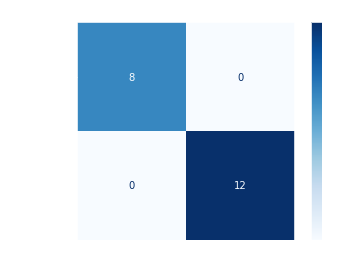

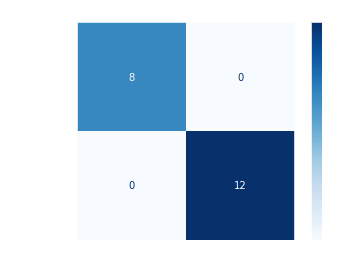

In [8]:
draw_cm(model, X_train, y_train, 'Confusion matrix: Trainset')
plt.show()
draw_cm(model, X_train, y_train, 'Confusion matrix: Testset')
plt.show()

* 예측 오차 (ERR)

\begin{split}
ERR = \frac{잘못된 예측 개수}{전체 샘플 개수}
\end{split}

In [9]:
err = (0 + 0)/20
err

0.0

* 예측 정확도 (ACC)

\begin{split}
ACC = \frac{잘된 예측 개수}{전체 샘플 개수} = 1-ERR
\end{split}

In [10]:
acc = (8 + 12)/20
acc

1.0

#### **결정경계**

In [11]:
from matplotlib.colors import ListedColormap

def draw_decision_region(model, X, y, 
                            X_test=[], y_test=[], 
                            features=[], labels=[]): # 결정경계

    colors = ('orangered', 'dodgerblue', 'limegreen', 'fuchsia', 'blueviolet')
    cmap = ListedColormap(colors[:len(np.unique( y))])

    x0mn, x0mx = X[:,0].min() -1, X[:,0].max() +1
    x1mn, x1mx = X[:,1].min() -1, X[:,1].max() +1
    x0 = np.arange(x0mn, x0mx, 0.02)
    x1 = np.arange(x1mn, x1mx, 0.02)
    print('* arange', x0.shape, x1.shape)
    X0, X1 = np.meshgrid(x0, x1)
    print('* meshgrid', x0.shape, x1.shape)
    x0, x1 = X0.ravel(), X1.ravel()
    print('* ravel', x0.shape, x1.shape)
    x_every = np.array([x0, x1]).T
    print('* every', x_every.shape)
    y_pred = model.predict(x_every)
    print('* y_pred', y_pred.shape)
    Y_pred = y_pred.reshape(X0.shape)
    print('* y_pred', y_pred.shape)

    if not len(labels): labels=[i for i in range(len(np.unique(y)))]
    plt.contourf(X0, X1, Y_pred, alpha=0.4, cmap=cmap )
    for idx, c in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c, 0], 
                    y = X[y == c, 1],
                    alpha=0.8,
                    c=colors[idx],
                    label=labels[idx],
                    marker='x',
                    linewidth=2)
    if len(X_test):
        for idx, c in enumerate(np.unique(y_test)):
            plt.scatter(x = X_test[y_test == c, 0], 
                        y = X_test[y_test == c, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker='o',
                        edgecolor='k',
                        linewidth=2)
    
    if features:
        plt.xlabel(features[0])
        plt.ylabel(features[1])
    plt.legend()

### **| 다중클래스 분류**

* `sepal` 관련 특성을 이용하여 3개 클래스 분류
* 최적화 방식 `lbfgs` 사용
* `multi_class`는 `multi_nomial`로 지정
* 정확도 출력
* 혼돈 행렬 시각화
* 결정경계 시각화

(80, 2) (20, 2) (80,) (20,) sepal ['setosa' 'versicolor']


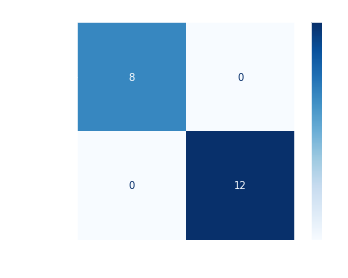

* arange (307,) (364,)
* meshgrid (307,) (364,)
* ravel (111748,) (111748,)
* every (111748, 2)
* y_pred (111748,)
* y_pred (111748,)


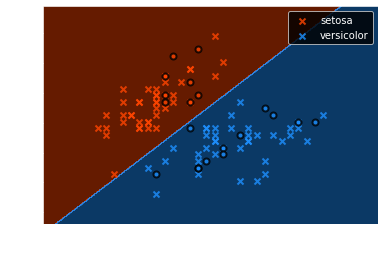

In [12]:
# 데이터 준비
X_train, X_test, y_train, y_test, columns, labels = iris_loader(2, 'sepal') 

# 학습
model = LogisticRegression(solver='lbfgs',
                           multi_class='multinomial')
model.fit(X_train, y_train)

# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_test, y_test)
draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc)}')
plt.show()

# 결정경계 시각화
draw_decision_region(model, X_train, y_train,
              X_test, y_test,
              features=columns,
              labels=labels)

plt.show()

#### **예제 01**

* 'petal' 관련 특성을 이용하여 3개 클래스 분류
* 모델
  * 최적화 방식 `saga` 사용
  * `multi_class`는 `multi_nomial`로 지정
* 평가
  * 정확도 출력
  * 혼돈 행렬 시각화
  * 결정경계 시각화

(120, 2) (30, 2) (120,) (30,) petal ['setosa' 'versicolor' 'virginica']


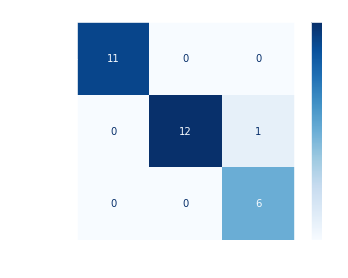

* arange (268,) (256,)
* meshgrid (268,) (256,)
* ravel (68608,) (68608,)
* every (68608, 2)
* y_pred (68608,)
* y_pred (68608,)


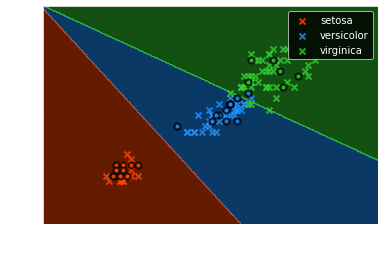

In [13]:
# 데이터 준비
X_train, X_test, y_train, y_test, columns, labels = iris_loader(3, 'petal') 

# 학습
model = LogisticRegression(solver='saga',
                           multi_class='multinomial')
model.fit(X_train, y_train)

# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_test, y_test)
draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc)}')
plt.show()

# 결정경계 시각화
draw_decision_region(model, X_train, y_train,
              X_test, y_test,
              features=columns,
              labels=labels)

plt.show()

#### **예제 02**

* 모든 특성(4개)을 이용하여 3개 클래스 분류
* 모델
  * 최적화 방식 `lbfgs` 사용
  * `multi_class`는 `multi_nomial`로 지정
* 평가
  * 정확도 출력
  * 혼돈 행렬 시각화

(120, 4) (30, 4) (120,) (30,) ('sepal', 'petal') ['setosa' 'versicolor' 'virginica']


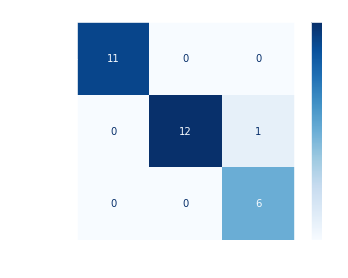

In [14]:
# 데이터 준비
X_train, X_test, y_train, y_test, columns, labels = iris_loader(3, ('sepal', 'petal')) 

# 학습
model = LogisticRegression(solver='lbfgs',
                           multi_class='multinomial')
model.fit(X_train, y_train)

# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_test, y_test)
draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc)}')
plt.show()

## 결정트리 (Decision tree)
---

<p align='center'>
<img src=https://camo.githubusercontent.com/436f5e942773563b85e5d640e5714c367e11cf08edc9da5b41598ab7dea951c9/68747470733a2f2f6769742e696f2f4a746d3231
?raw=true width=600>
</p>

훈련 데이터의 특성(속성)을 기반으로 샘플의 클래스 레이블을 추정할 수 있는 일련의 질문을 학습

데이터의 특성이 범주형이 아니라 실수라면 특정 값을 기준으로 크고 작음의 범주로 나누게 된다.

데이터 분할 기준은 정보이득 (Information Gain, IG)의  최대화이며, 정보이득은 불순도로 부터 구해진다.

불순도(Impurity) 란 특정 영역 내에 클래스가 얼마나 섞여있는지를 나타내는 지표
* class : 1,2,3,4,5,6,7 = Impurity Up
* class : 1 = Impurity Dawn

리프 노드(leaf node)가 순수해질 때까지 모든 자식 노드에서 분할 작업을 반복한다.

너무 많은, 깊은 트리가 만들어 지면 과적합의 가능성이 높아지기 때문에 트리의 최대 깊이를 제한하여 트리를 가지치기(pruning) 한다.






### **| 불순도 지표: 엔트로피(Entropy)**

\begin{split}
I_H(t) = -\sum_{i=1}^{c}p(i|t)log_2p(i|t)
\end{split}

* $p(i|t)$ : 
* $I_H$ 의 범위 : 
* $I_H = 1 $: 
* $I_H = 0 $: 
* 불순도(엔트로피)


In [15]:
# 이진 분류
def entropy(p): # p는 0~1
    return - p * np.log2(p) - (1-p) * np.log2(1-p)

In [16]:
p = np.arange(0.01, 1, 0.1)
entropy(p)

array([0.08079314, 0.49991596, 0.74148274, 0.89317346, 0.97650047,
       0.99971144, 0.96479955, 0.86872125, 0.70147146, 0.43646982])

![](https://github.com/yebiny/Lecture-Deeplearning/blob/main/imgs/bdt_%EB%B6%88%EC%88%9C%EB%8F%84.PNG?raw=true)

### **| 불순도 지표: 지니 불순도(Gini impurity, $I_G$)**

\begin{split}
I_G(t) = \sum_{i=1}^{c}p(i|t)(1-p(i|t)) 
\end{split}

* $p(i|t)$ :  특정 노드 t에 클래스 i에 속한 샘플의 확률
* $I_G$ 의 범위 : 0~1
* $I_G = 0.5 $: 클래스가 균등하게 분포( 완벽하게 섞인 / 불순도, 순도가 어디를 집던 불순한?)
* $I_G = 0 $: 한쪽만 분포
* 불순도(지니)

In [17]:
def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))

In [18]:
gini(p)

array([0.0198, 0.1958, 0.3318, 0.4278, 0.4838, 0.4998, 0.4758, 0.4118,
       0.3078, 0.1638])

### **| 불순도 지표: 분류 오차(Classification error, $I_E$)**

\begin{split}
I_H(E) = 1-max\{p(i|t)\} 
\end{split}




In [19]:
def error(p):
    return 1-np.max( [p, 1-p] )

In [20]:
[error(pi) for pi in p]

[0.010000000000000009,
 0.10999999999999999,
 0.20999999999999996,
 0.31000000000000005,
 0.41000000000000003,
 0.49,
 0.3899999999999999,
 0.2899999999999999,
 0.18999999999999995,
 0.08999999999999997]

#### **p값에 따른 불순도 지표 변화**

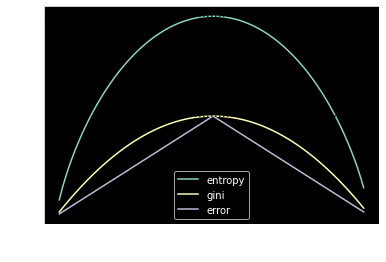

In [21]:
p = np.arange(0.01, 0.99, 0.01)
plt.plot(p, entropy(p), label='entropy') # p값에 따른 entropy
plt.plot(p, gini(p), label='gini') # p값에 따른 gini
plt.plot(p, [error(pi) for pi in p], label='error') # p값에 따른 error
plt.axhline(y=1,c='k', linestyle=':')
plt.axhline(y=.5,c='k', linestyle=':')
plt.xticks()
plt.xlabel('p')
plt.ylabel('Impurity')
plt.legend()
plt.show()

### **| 정보이득 (Information Gain)**

결정트리의 목적함수는 아래와 같습니다. 이 목적 함수는 각 분할이 정보 이득을 최대화 하도록 합니다. 

\begin{split}
IG(D_p, f) = I(D_p) - \sum_{j=1}^m \frac{N_j}{N_p}I(D_j)
\end{split}

\begin{split}
정보 이득  = (부모노드의 불순도) - 정규화된 (자식 노드의 불순도)
\end{split}

* $f$: 특정 노드 t에 클래스 i에 속한 샘플의 확률
* $D_p$ : 0~1
* $D_j$ : 클래스가 균등하게 분포( 완벽하게 섞인 / 불순도, 순도가 어디를 집던 불순한?)
* $I$: 
* $N_p$: 
* $N_j$: 
* $I$: 
* 정보이득이 높다 : 
* 정보이득이 낮다 : 

#### **예제 03**

다음 조건으로 분할이 진행되었을 때 정보이득을 계산하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0510-01.PNG?raw=true
?raw=true width=750>
</p>

#### **예제 04**

다음 A, B 조건으로 분할이 진행되었을 때 각각의 정보이득을 계산하고 어떤 분할이 더 적합한지 계산하세요.

<p align='center'>
<img src=https://camo.githubusercontent.com/c0c17de8d888513d12a1aa27c226d8e0e50a1ea02496719190899ce57ea5ca7a/68747470733a2f2f6769742e696f2f4a746d3244?raw=true
?raw=true width=600>
</p>

In [22]:
# A, 지표:entropy
p_p = 40/80 # 부모노드 한쪽 클래스 확률
I_p = np.round(entropy(p_p),2) # 부모노드 불순도

p_1 = 30/40 # 자식1 노드 한쪽 클래스 확률
I_1 = np.round(entropy(p_1),2) # 자식1 노드 불순도

p_2 = 10/40 # 자식2 노드 한쪽 클래스 확률
I_2 = np.round(entropy(p_2),2) # 자식2 노드 불순도

print(I_p, I_1, I_2) # 부모, 자식1, 자식2 불순도
# Information gain
N_p, N_1 , N_2 = 80, 40, 40 # 부모, 자식1, 자식2 전체샘플 개수
print(N_p, N_1, N_2)

IG = I_p - (N_1/N_p)*I_1 - (N_2/N_p)*I_2
IG = np.round(IG, 2)
print('IG:',IG)

1.0 0.81 0.81
80 40 40
IG: 0.19


### | 사이킷런을 이용한 구현

[사이킷런 - DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)
```
tree.DecisionTreeClassifier(*, criterion='gini', 
                           splitter='best', 
                           max_depth=None, 
                           min_samples_split=2, 
                           min_samples_leaf=1,
                           min_weight_fraction_leaf=0.0,
                           max_features=None, 
                           random_state=None, 
                           max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           class_weight=None, 
                           ccp_alpha=0.0)
```

* 'petal' 관련 특성으로 3개 멀티클래스 분류
* 모델
  * 지니 불순도 사용
  * 최대 트리 깊이 5
* 평가
  * 정확도 계산
  * 혼돈행렬 시각화
  * 결정경계 시각화
  * 결정트리 시각화

(120, 2) (30, 2) (120,) (30,) petal ['setosa' 'versicolor' 'virginica']


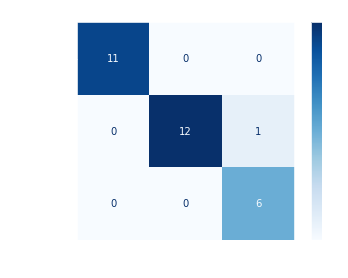

* arange (268,) (256,)
* meshgrid (268,) (256,)
* ravel (68608,) (68608,)
* every (68608, 2)
* y_pred (68608,)
* y_pred (68608,)


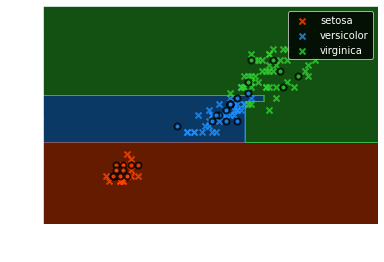

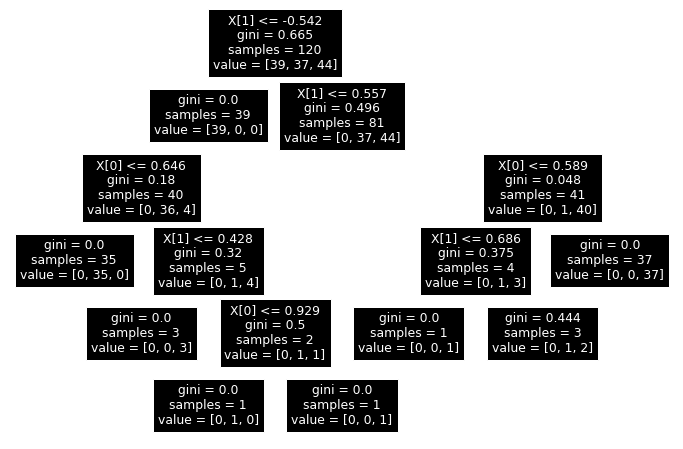

In [28]:
draw(3, 'petal', 'gini', 5)

(120, 2) (30, 2) (120,) (30,) petal ['setosa' 'versicolor' 'virginica']


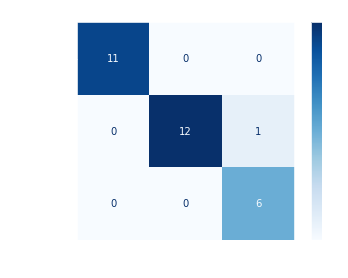

* arange (268,) (256,)
* meshgrid (268,) (256,)
* ravel (68608,) (68608,)
* every (68608, 2)
* y_pred (68608,)
* y_pred (68608,)


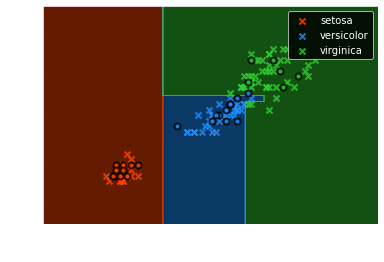

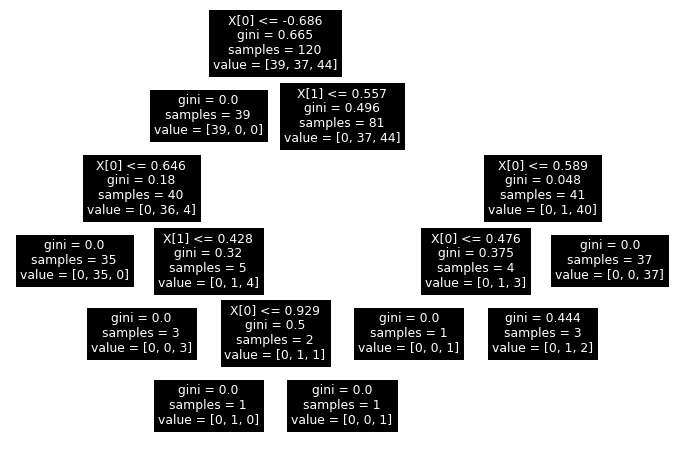

In [27]:
# 데이터 준비
X_train, X_test, y_train, y_test, columns, labels = iris_loader(3, 'petal') 

# 학습
model = DecisionTreeClassifier(criterion='gini', 
                               max_depth=5)
model.fit(X_train, y_train)


# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_test, y_test)
draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc, 2)}')
plt.show()


# 결정경계 시각화
draw_decision_region(model, X_train, y_train,
              X_test, y_test,
              features=columns,
              labels=labels)

plt.show()


# 트리 시각화
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()


#### **예제 05**

* 'sepal' 관련 특성으로 3개 멀티클래스 분류
* 모델
  * 지니 불순도 사용
  * 최대 트리 깊이 4
* 평가
  * 정확도 계산
  * 혼돈행렬 시각화
  * 결정경계 시각화
  * 결정트리 시각화


(120, 2) (30, 2) (120,) (30,) sepal ['setosa' 'versicolor' 'virginica']


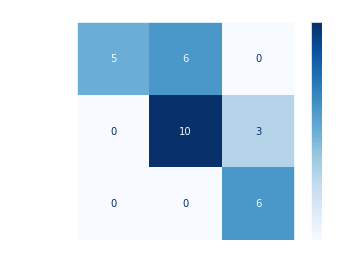

* arange (305,) (387,)
* meshgrid (305,) (387,)
* ravel (118035,) (118035,)
* every (118035, 2)
* y_pred (118035,)
* y_pred (118035,)


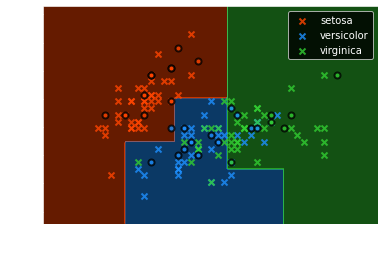

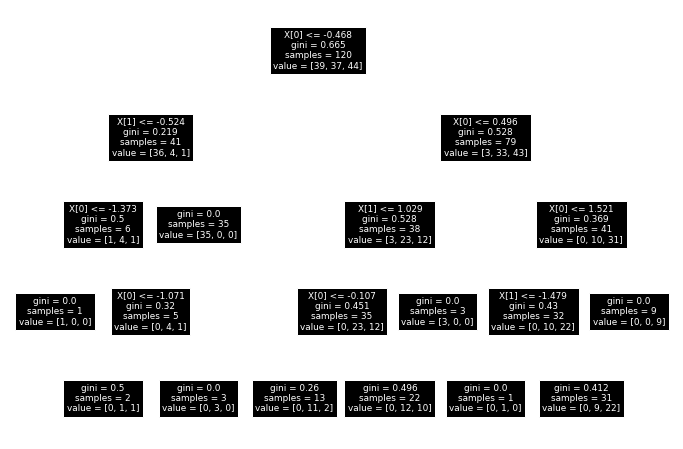

In [29]:
draw(loaderint=3, loaderstr='sepal', chaosstr='gini', maxdepth=4, TRE=True, DEC=True, ACC=True)

#### **예제 06**

* 'sepal' 관련 특성으로  3개 멀티클래스 분류
* 모델
  * 엔트로피 불순도 사용
  * 최대 트리 깊이 3
* 평가
  * 정확도 계산
  * 혼돈행렬 시각화
  * 결정경계 시각화
  * 결정트리 시각화

(120, 2) (30, 2) (120,) (30,) sepal ['setosa' 'versicolor' 'virginica']


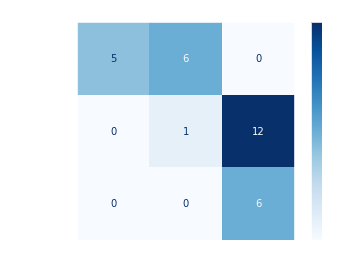

* arange (305,) (387,)
* meshgrid (305,) (387,)
* ravel (118035,) (118035,)
* every (118035, 2)
* y_pred (118035,)
* y_pred (118035,)


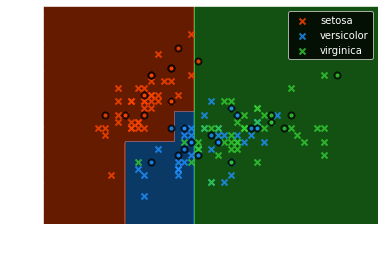

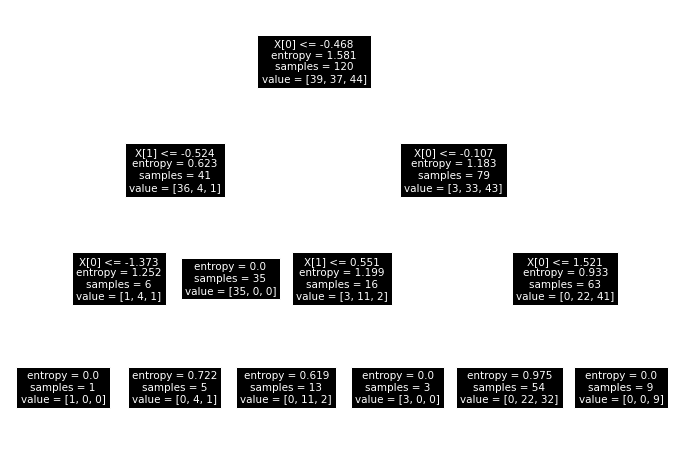

In [30]:
draw(3, 'sepal', 'entropy', 3)

## 서포트 벡터 머신 (Support Vector Machine)
---

서포트 벡터 머신(Support Vector Machine, SVM)은 강력하고 널리 사용되는 학습 알고리즘으로, 퍼셉트론 계열의 알고리즘을 확장 시킨 개념으로 생각 할 수 있다.

* 퍼셉트론의 아이디어: 분류 오차의 최소화
* 서포트 벡터 머신의 아이디어: 마진(margine)의 최대화

이 때 마진은 결정 경계(초평면)과 초평면에 가장 가까운 훈련 샘플 사이 거리로 정의

이 때 가장 가까운 샘플을 서포트 벡터(support vector)라 한다.


<p align='center'>
<img src=https://camo.githubusercontent.com/c63b819ba8417477499bd6b7017f4433d7362f1bbfab22035ce37ab6e4889b1b/68747470733a2f2f6769742e696f2f4a746d3272
?raw=true width=800>
</p>







### **| 제약 조건**
---
- 모든 샘플이 정확하게 분류 되었을 때, 

\begin{split}
w_o + w^Tx^{(i)} \geq 1 
\\
w_o + w^Tx^{(i)} \leq -1 
\end{split}


### **| 목적 함수** 
---
- 마진(margin)을 최대화

\begin{split}
\frac{w^T(x_{pos}-x_{neg})}{||w||_2}=\frac{2}{||w||_2}
\end{split}


### | 사이킷런을 이용한 구현

[사이킷런 - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
```
svm.SVC(C=1.0,  # 규제 강도
        kernel='rbf', # linear 직선  poly 다항  rbf 가우시안  sigmoid 시그모이드  precomputed ?
        degree=3, 
        gamma='scale', 
        coef0=0.0, 
        shrinking=True, 
        probability=False, 
        tol=0.001, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=- 1, 
        decision_function_shape='ovr', 
        break_ties=False, 
        random_state=None)
```

* 'petal' 관련 특성으로  멀티클래스 분류
* 모델
  * `kernel` = 'linear'
  * `C` = 1
* 평가
  * 정확도 계산
  * 혼돈행렬 시각화
  * 결정경계 시각화

In [58]:
def Peng(loader, model, TRE=False, DEC=False, ACC=False):

    X_train, X_test, y_train, y_test, columns, labels = loader
    
    model.fit(X_train, y_train)

    if ACC:
        acc = model.score(X_test, y_test)
        draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc, 2)}')
        plt.show()

    if DEC:
        draw_decision_region(model, X_train, y_train,
                    X_test, y_test,
                    features=columns,
                    labels=labels)
        plt.show()

    if TRE:
        plt.figure(figsize=(12,8))
        plot_tree(model)
        plt.show()

In [47]:
def drawS(loaderint=2, loaderstr='', kernel='', C=1, gamma='scale', TRE=True, DEC=True, ACC=True):

    X_train, X_test, y_train, y_test, columns, labels = iris_loader(loaderint, loaderstr) 
    
    model = SVC(kernel=kernel, C=C, gamma=gamma)
    model.fit(X_train, y_train)

    if ACC:
        acc = model.score(X_test, y_test)
        draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc, 2)}')
        plt.show()

    if DEC:
        draw_decision_region(model, X_train, y_train,
                    X_test, y_test,
                    features=columns,
                    labels=labels)
        plt.show()

    if TRE:
        plt.figure(figsize=(12,8))
        plot_tree(model)
        plt.show()

In [ ]:
for addw in ['linear', 'poly', 'rbf', 'sigmoid']: drawS(3, 'petal', addw, 1, TRE=False)

#### **예제 07**

* 'sepal' 관련 특성으로  3개 멀티클래스 분류
* 모델
  * `kernel` = 'linear'
  * `C` = 0.01, 0.1, 1, 10, 100 일때, 각각에 대한 모델 학습 및 평가
* 평가
  * 정확도 계산
  * 혼돈행렬 시각화
  * 결정경계 시각화

In [ ]:
for C in [0.01, 0.1, 1, 10, 100]: drawS(3, 'sepal', kernel = 'linear', C=C, TRE=False)

### **| 커널 SVM**

* 'petal' 관련 특성으로  멀티클래스 분류
* 모델
  * `kernel` = 'linear', 'poly', 'rbf', 'sigmoid' 일 때, 각각에 대한 모델 학습 및 평가
* 평가
  * 정확도 계산
  * 혼돈행렬 시각화
  * 결정경계 시각화

In [ ]:
for C in ['linear', 'poly', 'rbf', 'sigmoid']: drawS(3, 'petal', C, 1, TRE=False)

### **| XOR 문제 풀기**




* 데이터 생성


```
np.random.seed(5)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, 0)
```

In [45]:
np.random.seed(5)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, 0)

* kernel =  ['linear', 'poly', 'rbf', 'sigmoid'] 각각에 대해 결정경계 시각화

In [ ]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']: drawS(3, 'sepal', kernel=kernel, TRE=False)

#### **`gamma` 값 조절하여 과적합 개념 이해하기**

In [ ]:
for gamma in [0.01, 0.1, 1, 10, 100]: drawS(3, 'sepal', kernel='rbf', gamma=gamma, TRE=False)

#### **규제를 사용하여 과대적합 피하기**

* Regularization: 파라미터 값이 과도해지는 것을 제한하기 위한 추가 항


$J(w) = \sum_i^n[-y^{(i)}log(\sigma(z^{(i)}))-(1-y^{(i)})log(1-\sigma(z^{(i)}))]+\frac{\lambda}{2}||w||^2$

In [ ]:
for C in [0.1, 1, 10, 100, 1000, 10000]: Peng( loader=iris_loader(3, 'sepal') , model=SVC(kernel='rbf', C=C, gamma=0.1), DEC=True, ACC=True )

* 적절한 하이퍼 파라미터 적용

## **과제1: 펭귄데이터셋 분류**
---
```
df = sns.load_dataset('penguins')
df.shape
```
* 펭귄데이터셋을 불러오고 간단히 전처리 후 멀티클래스 분류를 진행합니다.
* 세 종류의 알고리즘을 사용해 보세요
* 각 알고리즘의 하이퍼파라미터를 조정해 가며 성능을 비교해 보세요.

In [55]:
df = sns.load_dataset('penguins')
df.shape

(344, 7)

In [69]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test, columns, labels = sns.load_dataset('penguins')

In [76]:
df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [77]:
def peangin(n_classes, 
                        features='',
                        test_size=0.2, 
                        rs=1,
                        scale=True):
    
    load = sns.load_dataset('penguins')
    X = load.loc(['bill_depth_mm'])
    y = load.loc(['bill_length_mm'])
    columns = load.columns #특징
    labels = load.loc(['species']) # 종류 
    
    # 클래스 개수 지정
    if n_classes ==3:
        mask = y!=3
        X = X[mask]
        y = y[mask]
        labels = labels[:3]

    else: pass
    # 특징 지정
    if features == 'sepal':
        X = X[: , :3 ]
        columns = columns[:3]
    elif features == 'petal': 
        X = X[: , 3: ]
        columns = columns[3:]
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                         test_size=test_size, 
                                                         random_state=rs
                                                         )
    # 스케일링 (Onry X)
    if scale: # scale =(True or False)
        sc_x = StandardScaler()
        X_train = sc_x.fit_transform(X_train)
        X_test = sc_x.transform(X_test)

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, features, labels)
    return X_train, X_test, y_train, y_test, columns, labels

In [79]:
def Peng(loader, model, TRE=False, DEC=False, ACC=False):

    X_train, X_test, y_train, y_test, columns, labels = loader
    
    model.fit(X_train, y_train)

    if ACC:
        acc = model.score(X_test, y_test)
        draw_cm(model, X_test, y_test, title=f'Acc:{np.round(acc, 2)}')
        plt.show()

    if DEC:
        draw_decision_region(model, X_train, y_train,
                    X_test, y_test,
                    features=columns,
                    labels=labels)
        plt.show()

    if TRE:
        plt.figure(figsize=(12,8))
        plot_tree(model)
        plt.show()

In [81]:
peangin(3, 'sepal')

TypeError: ignored

In [80]:
Peng( loader=peangin(3, 'sepal') , model=SVC(kernel='rbf', C=1, gamma=100), DEC=True )

TypeError: ignored

## **과제2: 타이타닉 : 누가 살아남았을까?**
---

* https://dacon.io/competitions/open/235539/data
* 수업 시간에 배운 내용들을 적용하여 이진분류를 진행하고 리더보드에 결과를 제출합니다.
* 평가 지표는 AUC 이지만 아직 배우지 않은 내용이므로, 우선 정확도로 평가하세요